# Let's do this

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/Users/macbookpro/Desktop/Alexandra_Borshenuk_guns.csv')
data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [4]:
#Оставляем только 2 вида intent 
data = data[(data ['intent'] == 'Suicide') | (data ['intent'] == 'Homicide')]
data.tail()

,year,month,intent,police,sex,age,race,hispanic,place,education
100793,2014,12,Homicide,0,M,36.0,Black,100,Home,2.0
100794,2014,12,Homicide,0,M,19.0,Black,100,Street,2.0
100795,2014,12,Homicide,0,M,20.0,Black,100,Street,2.0
100796,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,1.0
100797,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,2.0


In [5]:
data.to_csv('data1.csv')

In [6]:
data = pd.read_csv('/Users/macbookpro/Desktop/data1.csv')
data.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [7]:
data = data.drop(['Unnamed: 0'], axis=1)

In [8]:
print('Размер выборки:', data.shape) 

Размер выборки: (98351, 10)


In [9]:
# Скажем пандасу, что мы считаем month, hispanic, education, police категориальными 
data['month'] = data['month'].astype(str)
data['police'] = data['police'].astype(str)
data['hispanic'] = data['hispanic'].astype(str)
data['education'] = data ['education'].astype(str)

In [10]:
target_var = 'intent'  # бинарная переменная, которую мы будем прогнозировать; она категориальная, потом будет называться 'Intent_Suicide' 

categor_var = ['month', 'police', 'sex', 'race', 'hispanic', 'place', 'education']     # категориальные
contin_var = ['year', 'age'] # непрерывные

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98351 entries, 0 to 98350
Data columns (total 10 columns):
year         98351 non-null int64
month        98351 non-null object
intent       98351 non-null object
police       98351 non-null object
sex          98351 non-null object
age          98335 non-null float64
race         98351 non-null object
hispanic     98351 non-null object
place        96968 non-null object
education    98351 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [12]:
data.isnull().sum()

year            0
month           0
intent          0
police          0
sex             0
age            16
race            0
hispanic        0
place        1383
education       0
dtype: int64

In [13]:
data.isnull().sum()/len(data)

year         0.000000
month        0.000000
intent       0.000000
police       0.000000
sex          0.000000
age          0.000163
race         0.000000
hispanic     0.000000
place        0.014062
education    0.000000
dtype: float64

In [14]:
data['age'] = data['age'].fillna(data['age'].mean())

In [15]:
data['place'].value_counts().head(1)

Home    59028
Name: place, dtype: int64

In [16]:
data['place'].fillna("Home", inplace = True)

In [17]:
data.isnull().sum()/len(data)

year         0.0
month        0.0
intent       0.0
police       0.0
sex          0.0
age          0.0
race         0.0
hispanic     0.0
place        0.0
education    0.0
dtype: float64

In [18]:
data[categor_var].head()

,month,police,sex,race,hispanic,place,education
0,1,0,M,Asian/Pacific Islander,100,Home,4.0
1,1,0,F,White,100,Street,3.0
2,1,0,M,White,100,Other specified,4.0
3,2,0,M,White,100,Home,4.0
4,2,0,M,White,100,Other specified,2.0


In [19]:
len(data['place'].unique())

10

In [20]:
len(data['police'].unique())

2

In [21]:
len(data['sex'].unique())

2

In [22]:
len(data['race'].unique())

5

In [23]:
len(data['hispanic'].unique())

39

In [24]:
len(data['education'].unique())

6

In [25]:
len(data['intent'].unique())

2

In [26]:
len(data['month'].unique())

12

In [27]:
dummies = pd.get_dummies(data['place'], prefix='Place', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['place'], axis=1, inplace=True)

In [28]:
dummies = pd.get_dummies(data['race'], prefix='Race', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['race'], axis=1, inplace=True)

In [29]:
dummies = pd.get_dummies(data['intent'], prefix='Intent', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['intent'], axis=1, inplace=True)

In [30]:
dummies = pd.get_dummies(data['police'], prefix='Police', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['police'], axis=1, inplace=True)

In [31]:
dummies = pd.get_dummies(data['sex'], prefix='Sex', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['sex'], axis=1, inplace=True)

In [32]:
dummies = pd.get_dummies(data['month'], prefix='Month', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['month'], axis=1, inplace=True)

In [33]:
dummies = pd.get_dummies(data['education'], prefix='Education', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['education'], axis=1, inplace=True)

In [34]:
frequency_encoding = dict(data['hispanic'].value_counts()/len(data))

data['hispanic'] = data['hispanic'].map(frequency_encoding)

In [35]:
data

,year,age,hispanic,Place_Home,Place_Industrial/construction,Place_Other specified,Place_Other unspecified,Place_Residential institution,Place_School/instiution,Place_Sports,...,Month_5,Month_6,Month_7,Month_8,Month_9,Education_2.0,Education_3.0,Education_4.0,Education_5.0,Education_nan
0,2012,34.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2012,21.000000,0.907444,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2012,60.000000,0.907444,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,64.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,31.000000,0.907444,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2012,17.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,41.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2012,43.984288,0.003030,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2012,30.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2012,21.000000,0.907444,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y = data['Intent_Suicide'].values
X = data.drop('Intent_Suicide',axis=1).values
X.shape, y.shape

((98351, 34), (98351,))

In [37]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

y_train = data_train['Intent_Suicide']
y_test = data_test['Intent_Suicide']

X_train = data_train.drop(['Intent_Suicide'], axis=1)
X_test = data_test.drop(['Intent_Suicide'], axis=1)

In [38]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(68845, 34) (68845,)
(29506, 34) (29506,)


# Метод ближайшего соседа

In [39]:
#он нам поможет потом + это интересненько
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [40]:
y_predicted = clf_knn.predict(X_test)
y_predicted

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.7777401206534265
Precision = 0.819549260829112
Recall = 0.8379135397949476
F1_score = 0.8286296644716211


In [42]:
clf_knn = KNeighborsClassifier(n_neighbors=10)  # возьмем не один ближайший объект, а 10
clf_knn.fit(X_train, y_train)
y_predicted = clf_knn.predict(X_test)

In [43]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.8372534399783095
Precision = 0.8476120137863121
Recall = 0.9097875488848959
F1_score = 0.8775999184339315


In [44]:
y_proba = clf_knn.predict_proba(X_test)
y_proba[:10]

array([[0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.3, 0.7]])

In [45]:
y_predicted = (y_proba [:,1] >= 0.5)
y_predicted[:10]

array([False,  True,  True,  True,  True,  True, False, False,  True,
        True])

In [46]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.8362366976208229
Precision = 0.831062030075188
Recall = 0.9346263608498044
F1_score = 0.8798069747773742


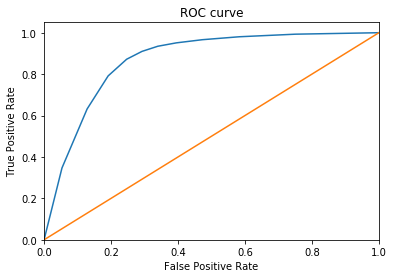

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])


plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [48]:
# считаем площадь под кривой
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

AUC = 0.8689307121338241



<img src="https://i01.fotocdn.net/s27/69/public_pin_m/28/2671909700.jpg" height="1500" width="1030">

# Одинокое дерево и случайный лес

In [49]:
from sklearn.tree import DecisionTreeClassifier 

In [50]:
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(X_train, y_train)          
y_predicted = clf_tree.predict(X_test)  
y_proba = clf_tree.predict_proba(X_test)

Accuracy = 0.7863824306920626
Precision = 0.8365605163492825
Recall = 0.8288235915865131
F1_score = 0.8326740821365047
AUC = 0.7753404361486225


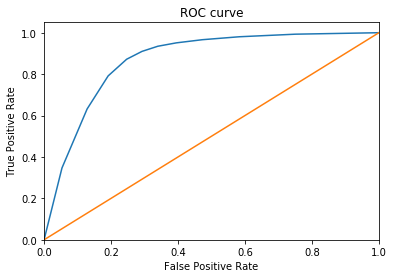

In [51]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [52]:
featureImportance = pd.DataFrame({"feature": data.drop('Intent_Suicide',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

,importance
feature,
Race_White,0.452288
age,0.174574
year,0.055639
Police_1,0.033029
Race_Black,0.026160
Place_Home,0.025508
Sex_M,0.017606
hispanic,0.013870
Month_10,0.012688


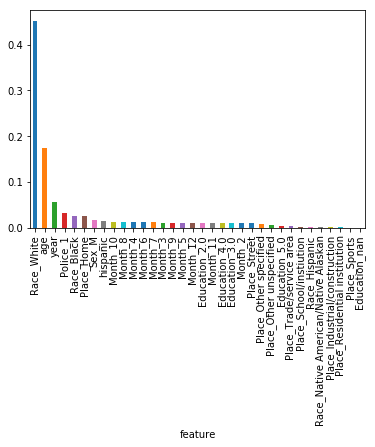

In [53]:
featureImportance["importance"].plot('bar')

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)

Accuracy = 0.8115637497458144
Precision = 0.8478600437363324
Recall = 0.8605855617799387
F1_score = 0.8541754091481326
AUC = 0.85513649772232


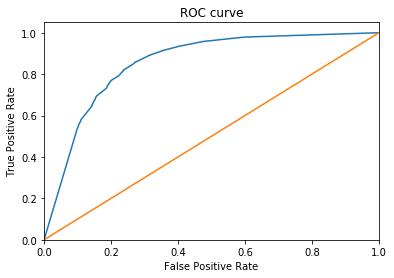

In [56]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

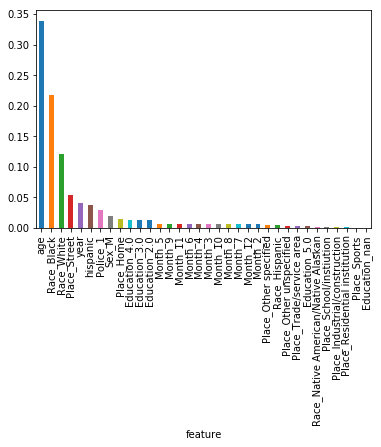

In [57]:
featureImportance = pd.DataFrame({"feature": data.drop('Intent_Suicide',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [58]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.predict_proba(X_test)
logit.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)

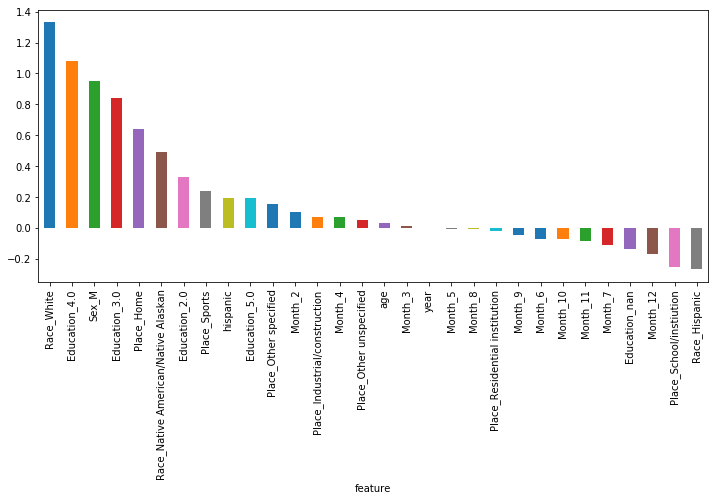

In [59]:
featureImportance = pd.DataFrame({"feature": data.drop('Intent_Suicide',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'n_neighbors':range(1, 2), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
y_proba = clf.predict_proba(X_test)[:,1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.7540380246215858


In [63]:
parameters = {
              'n_estimators': [10,20,50,70,100],           
              'min_samples_leaf': [1, 3, 5, 7, 10],        
             }


rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(X, y)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
y_predicted = gcv.predict(X_test)
y_proba = gcv.predict_proba(X_test)

# Finally, метрики

In [65]:
from sklearn import metrics  
print('Accuracy =', metrics.accuracy_score(y_test, y_predicted))
print('Precision =', metrics.precision_score(y_test, y_predicted))
print('Recall =', metrics.recall_score(y_test, y_predicted))
print('F1_score =', metrics.f1_score(y_test, y_predicted))


Accuracy = 0.8605368399647529
Precision = 0.8673646603483353
Recall = 0.9237924109502167
F1_score = 0.8946896992962252


In [66]:
y_proba = clf.predict_proba(X_test)[:,1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.7540380246215858


In [67]:
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.7540380246215858


In [68]:
#удобненько смотреть
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.85      0.75      0.79     10584
          1       0.87      0.92      0.89     18922

avg / total       0.86      0.86      0.86     29506



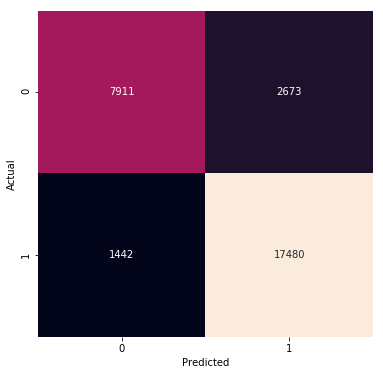

In [69]:
#мне просто понравились эти квадратики, и я их оставила
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

# I DID IT!!!!!!!!!!

<img src="http://i2.beon.ru/48/61/1906148/86/88554086/M6TZjVxjooM.jpeg" height="1500" width="1030">